In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({"Nome": ["Joao", "maria"], "IDADE": [10, 12]})

In [3]:
df

,Nome,IDADE
0,Joao,10
1,maria,12


### Convertendo os labels das colunas para minusculo


In [4]:
df_lower = df.rename(columns=str.lower)
display(df_lower)
display(df)

,nome,idade
0,Joao,10
1,maria,12


,Nome,IDADE
0,Joao,10
1,maria,12


In [5]:
def turn_in_lower_case(column_label: str) -> str:
    return column_label.lower()

df_lower_personalized = df.rename(columns=turn_in_lower_case)
display(df_lower_personalized)
display(df)

,nome,idade
0,Joao,10
1,maria,12


,Nome,IDADE
0,Joao,10
1,maria,12


### Filtrando linhas e colunas

In [12]:
df_lower_personalized[(df_lower_personalized["nome"] == "maria") & (df_lower_personalized["idade"] == 12)]

,nome,idade
1,maria,12


### Pivot

In [3]:
df_location = pd.DataFrame({"location": ["BETR801", "FRST123"], "value": [10, 20]})
df_location

,location,value
0,BETR801,10
1,FRST123,20


In [4]:
df_location.pivot(columns="location", values="value")

location,BETR801,FRST123
0,10.0,NaN
1,NaN,20.0


<Axes: >

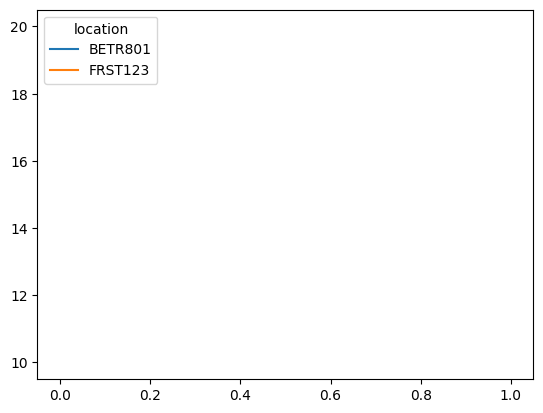

In [5]:
df_location.pivot(columns="location", values="value").plot()

In [11]:
df_location = pd.DataFrame({"location": ["BETR801", "FRST123"], "value": [10, 20]})

df_pivot = df_location.pivot(columns="location", values="value")
df_pivot

location,BETR801,FRST123
0,10.0,NaN
1,NaN,20.0


In [17]:
df_pivot.melt(value_vars=["BETR801", "FRST123"], value_name="value_personalized", ignore_index=False).dropna()

,location,value_personalized
0,BETR801,10.0
1,FRST123,20.0


### Dataframe a partir de dataclasses

In [18]:
from dataclasses import make_dataclass

In [21]:
Point = make_dataclass("Point",[("x", int), ("y", str)])
df_dataclasses = pd.DataFrame([Point(0, "10"),Point(0, "5"),Point(10, "20")])
df_dataclasses

,x,y
0,0,10
1,0,5
2,10,20


In [26]:
### Seleciona counas baseadas no tipo
import numpy as np
df_dataclasses.select_dtypes(include=[np.number])


,x
0,0
1,0
2,10


In [27]:
df_dataclasses.memory_usage()

Index    132
x         24
y         24
dtype: int64

In [31]:
df_dataclasses.astype({"y": "int64"}).dtypes

x    int64
y    int64
dtype: object

In [37]:
df_dataclasses.convert_dtypes()

,x,y
0,0,10
1,0,5
2,10,20


#### pd.DataFrame.at
Access a single value for a row/column pair by label.

#### DataFrame.iat
Access a single value for a row/column pair by integer position.

In [88]:
import pandas as pd
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                  index=[4, 5, 6], columns=['A', 'B', 'C'])
df

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,30


In [89]:

### df.at[index_line, column_label]
print(df.at[5, 'B'])


4


In [90]:
def find_value(value: int, column: str) -> bool:
    column = column.lower()
    df.columns = [column.lower() for column in df.columns]
    return df[column] == value

# loc para filtrar, interessante
df.loc[find_value(30, 'c')]

,a,b,c
6,10,20,30


In [91]:
for column, content in df.items():
    print(column)
    print("*" * 100)
    print(print(type(content)))

a
****************************************************************************************************
<class 'pandas.core.series.Series'>
None
b
****************************************************************************************************
<class 'pandas.core.series.Series'>
None
c
****************************************************************************************************
<class 'pandas.core.series.Series'>
None


In [93]:
display(df.keys())
df_pop = df.copy()
# df_pop.pop("c")

Index(['a', 'b', 'c'], dtype='object')

In [94]:
df

,a,b,c
4,0,2,3
5,0,4,1
6,10,20,30


#### numpy.where

Replace values where the condition is False.

In [5]:
import pandas as pd
import numpy as np

# Criando um DataFrame de exemplo
df = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                   'B': [6, 7, 8, 9, 10]})


def retorna_true():
    return True

def retorna_false():
    return False

# Lista de condições usando np.where
conditions = {
    "elemento1": df["A"] > 2,
    "elemento2": df["B"] <= 6,
}

for label, condition in conditions.items():
    df[label] = np.where(condition, retorna_true(), retorna_false())

df


,A,B,elemento1,elemento2
0,1,6,False,True
1,2,7,False,False
2,3,8,True,False
3,4,9,True,False
4,5,10,True,False


#### pandas.DataFrame.explode

Transform each element of a list-like to a row, replicating index values.

columnIndexLabel
Column(s) to explode. For multiple columns, specify a non-empty list with each element be str or tuple, and all specified columns their list-like data on same row of the frame must have matching length.

ignore_indexbool, default False
If True, the resulting index will be labeled 0, 1, …, n - 1.

In [23]:
import pandas as pd

df = pd.DataFrame({'A': [[0, 1, 2], 'foo', [], [3, 4]],
                   'B': 1,
                   'C': [[['a'], 'b', 'c'], np.nan, [], ['d', 'e']]})

df

,A,B,C
0,"[0, 1, 2]",1,"[[a], b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [24]:
df.explode("A")

,A,B,C
0,0,1,"[[a], b, c]"
0,1,1,"[[a], b, c]"
0,2,1,"[[a], b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [25]:
df.explode(["A", "C"], ignore_index=True)

,A,B,C
0,0,1,[a]
1,1,1,b
2,2,1,c
3,foo,1,NaN
4,NaN,1,NaN
5,3,1,d
6,4,1,e


#### DataFrame.transform

DataFrame.transform(func, axis=0, *args, **kwargs)[source]
Call func on self producing a DataFrame with the same axis shape as self.

In [30]:
import pandas as pd

df = pd.DataFrame({'A': [[0, 1, 2], 'foo', [], [3, 4]],
                   'B': 1,
                   'C': [[['a'], 'b', 'c'], np.nan, [], ['d', 'e']]})

df = pd.DataFrame({'A': range(3), 'B': range(1, 4)})
display(df)
display(df.transform([np.sqrt, np.exp]))

,A,B
0,0,1
1,1,2
2,2,3


A                   B           
       sqrt       exp      sqrt        exp
0  0.000000  1.000000  1.000000   2.718282
1  1.000000  2.718282  1.414214   7.389056
2  1.414214  7.389056  1.732051  20.085537

#### Aplicando operações matemáticas no dataframe

In [37]:
import pandas as pd

df = pd.DataFrame({'angles': [0, 3, 4],
                   'degrees': [360, 180, 360]},
                  index=['circle', 'triangle', 'rectangle'])
# Sum add()

print("original")
display(df)

print("add()")
display(df.add(1))

print("sub()")
display(df.sub(1))

print("mul()")
display(df.mul(10))

print("div()")
display(df.div(10))

print("truediv()")
display(df.truediv(10))

print("floordiv()")
display(df.floordiv(10))

print("pow()")
display(df.pow(2))

original


,angles,degrees
circle,0,360
triangle,3,180
rectangle,4,360


add()


,angles,degrees
circle,1,361
triangle,4,181
rectangle,5,361


sub()


,angles,degrees
circle,-1,359
triangle,2,179
rectangle,3,359


mul()


,angles,degrees
circle,0,3600
triangle,30,1800
rectangle,40,3600


div()


,angles,degrees
circle,0.0,36.0
triangle,0.3,18.0
rectangle,0.4,36.0


truediv()


,angles,degrees
circle,0.0,36.0
triangle,0.3,18.0
rectangle,0.4,36.0


floordiv()


,angles,degrees
circle,0,36
triangle,0,18
rectangle,0,36


pow()


,angles,degrees
circle,0,129600
triangle,9,32400
rectangle,16,129600


##### Cooncatenando listas de Dataframes

In [35]:
import pandas as pd

list_dfs = [pd.DataFrame({"columnA": [1, 2, 3]}), pd.DataFrame({"columnB": [1, 2, 3]}), pd.DataFrame({"columnC": [1, 2]})]

pd.concat([df] + list_dfs)

,angles,degrees,columnA,columnB,columnC
circle,0.0,360.0,NaN,NaN,NaN
triangle,3.0,180.0,NaN,NaN,NaN
rectangle,4.0,360.0,NaN,NaN,NaN
0,NaN,NaN,1.0,NaN,NaN
1,NaN,NaN,2.0,NaN,NaN
2,NaN,NaN,3.0,NaN,NaN
0,NaN,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,2.0,NaN
2,NaN,NaN,NaN,3.0,NaN
0,NaN,NaN,NaN,NaN,1.0


#### Mltiplicação de matrizes (dot())

In [43]:
import pandas as pd

df = pd.DataFrame([[0, 1, -2, -1], [1, 1, 1, 1]])
other = pd.DataFrame([[0, 1], [1, 2], [-1, -1], [2, 0]])

print("Original")
display(df)

print("Other")
display(other)

print("DOT")
display(df.dot(other))



Original


,0,1,2,3
0,0,1,-2,-1
1,1,1,1,1


Other


,0,1
0,0,1
1,1,2
2,-1,-1
3,2,0


DOT


,0,1
0,1,4
1,2,2


#### Aplica operadores lógicos a um dataframe

In [48]:
import pandas as pd

df = pd.DataFrame({'cost': [250, 150, 100],
                   'revenue': [100, 250, 300]},
                  index=['A', 'B', 'C'])

print("EQ")
display(df.eq(100))

print("LE (less than or equal)")
display(df.le(100))

print("NE (Not equal)")
display(df.ne(100))

print("GE (Greater than or equal)")
display(df.ge(100))

print("GT (Greater than)")
display(df.gt(100))

EQ


,cost,revenue
A,False,True
B,False,False
C,True,False


LE (less than or equal)


,cost,revenue
A,False,True
B,False,False
C,True,False


NE (Not equal)


,cost,revenue
A,True,False
B,True,True
C,False,True


GE (Greater than or equal)


,cost,revenue
A,True,True
B,True,True
C,True,True


GT (Greater than)


,cost,revenue
A,True,False
B,True,True
C,False,True


#### dataframe.combine


In [50]:
import pandas as pd

df1 = pd.DataFrame({'A': [0, 0], 'B': [4, 4]})
df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
df1.combine(df2, lambda s1, s2: s1 if s1.sum() < s2.sum() else s2)

,A,B
0,0,3
1,0,3


In [51]:
import pandas as pd

df1 = pd.DataFrame({'A': [0, 0], 'B': [None, 4]})
df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
df1.combine(df2, lambda s1, s2: s1 if s1.sum() < s2.sum() else s2, fill_value=-5)

,A,B
0,0,-5.0
1,0,4.0


#### dataframe.apply()

Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

In [64]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])

print("df original")
display(df)

print("Default axis=0 or index")
display(df.apply(np.sqrt))

print("reducing")
display(df.apply(np.sum, axis=0))

print("Returning a list-like will result in a Series")
display(df.apply(lambda x: [1, 2], axis=1))

print("Passing result_type='expand' will expand list-like results to columns of a Dataframe")
display(df.apply(lambda x: [1, 2], axis='columns', result_type='expand'))

display(df.apply(lambda x: pd.Series([1, 2], index=['foo', 'bar']), axis=1))

print("""
    Passing result_type='broadcast' will ensure the same shape result,
    whether list-like or scalar is returned by the function,
    and broadcast it along the axis. The resulting column names will be the originals.
""")
display(df.apply(lambda x: [1, 2], axis='columns', result_type='broadcast'))


df original


,A,B
0,4,9
1,4,9
2,4,9


Default axis=0 or index


,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


reducing


A    12
B    27
dtype: int64

Returning a list-like will result in a Series


0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

Passing result_type='expand' will expand list-like results to columns of a Dataframe


,0,1
0,1,2
1,1,2
2,1,2


,foo,bar
0,1,2
1,1,2
2,1,2



    Passing result_type='broadcast' will ensure the same shape result,
    whether list-like or scalar is returned by the function,
    and broadcast it along the axis. The resulting column names will be the originals.



,A,B
0,1,2
1,1,2
2,1,2


#### Dataframe.pipe
Apply chainable functions that expect Series or DataFrames.

In [65]:
import pandas as pd
data = [[8000, 1000], [9500, np.nan], [5000, 2000]]
df = pd.DataFrame(data, columns=['Salary', 'Others'])

def subtract_federal_tax(df):
    return df * 0.9
def subtract_state_tax(df, rate):
    return df * (1 - rate)
def subtract_national_insurance(df, rate, rate_increase):
    new_rate = rate + rate_increase
    return df * (1 - new_rate)

(df.pipe(subtract_federal_tax)
     .pipe(subtract_state_tax, rate=0.12)
      .pipe(subtract_national_insurance, rate=0.05, rate_increase=0.02))


,Salary,Others
0,5892.48,736.56
1,6997.32,NaN
2,3682.80,1473.12


If you have a function that takes the data as (say) the second argument, pass a tuple indicating which keyword expects the data. For example, suppose national_insurance takes its data as df in the second argument:

One of the functions expected the dataframe as second argument and not first as default to pipe, so, use a string to indicate to pipe where goes the data

In [66]:
def subtract_national_insurance(rate, df, rate_increase):
    new_rate = rate + rate_increase
    return df * (1 - new_rate)
(
    df.pipe(subtract_federal_tax)
    .pipe(subtract_state_tax, rate=0.12)
    .pipe(
        (subtract_national_insurance, 'df'),
        rate=0.05,
        rate_increase=0.02
    )
)


,Salary,Others
0,5892.48,736.56
1,6997.32,NaN
2,3682.80,1473.12


In [70]:
import pandas as pd

df = pd.DataFrame(data={'Animal': ['cat', 'penguin', 'dog',
                                   'spider', 'snake'],
                        'Number_legs': [4, 2, 4, 8, np.nan]})

df['default_rank'] = df['Number_legs'].rank()
df['max_rank'] = df['Number_legs'].rank(method='max')
df['NA_bottom'] = df['Number_legs'].rank(na_option='bottom')
df['pct_rank'] = df['Number_legs'].rank(pct=True)

df

,Animal,Number_legs,default_rank,max_rank,NA_bottom,pct_rank
0,cat,4.0,2.5,3.0,2.5,0.625
1,penguin,2.0,1.0,1.0,1.0,0.250
2,dog,4.0,2.5,3.0,2.5,0.625
3,spider,8.0,4.0,4.0,4.0,1.000
4,snake,NaN,NaN,NaN,5.0,NaN


#### between_time

In [72]:
import pandas as pd

i = pd.date_range('2018-04-09', periods=4, freq='1D20min')
ts = pd.DataFrame({'A': [1, 2, 3, 4]}, index=i)


display(ts)
display(ts.between_time('0:15', '0:45'))

,A
2018-04-09 00:00:00,1
2018-04-10 00:20:00,2
2018-04-11 00:40:00,3
2018-04-12 01:00:00,4


,A
2018-04-10 00:20:00,2
2018-04-11 00:40:00,3
